In [ ]:
from google.colab import drive
drive.mount('googledrive')

Mounted at googledrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

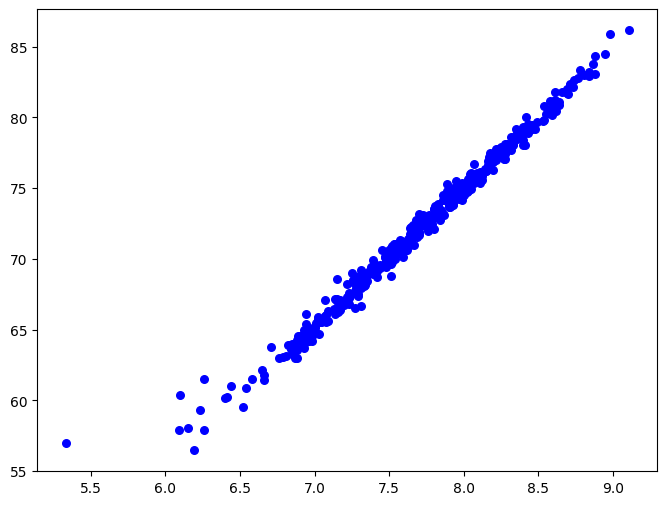

Weights =  [9.36632613]
bias =  0.04292907990749297
error =  0.4557142624283429


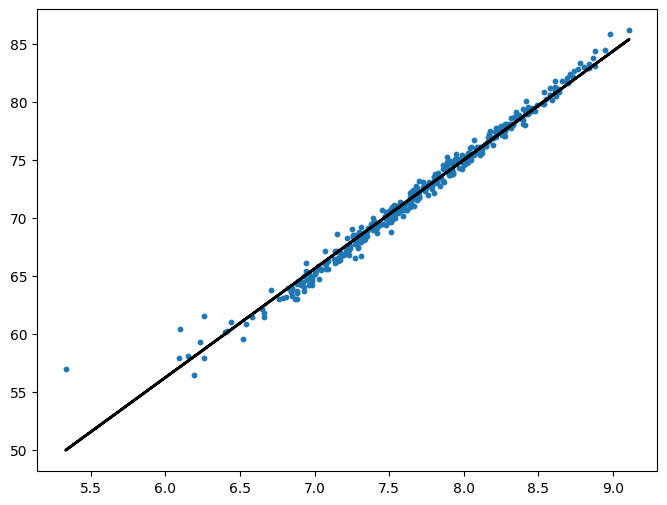

[74.31789529]


In [ ]:
def activation_func(x):
  return x

def cal_error(y,y_pred):
  return (np.mean((y_pred - y)**2))


class neuron:
  def __init__(self,itr):
    self.weights = None
    self.bias = None
    self.activation_function = activation_func
    self.n_itr = itr
    self.error = 0
    self.lr = 0

  def fit(self,X,y,learning_rate):
    min_error = 0.1
    n_samples , n_features = X.shape
    self.weights = np.full(n_features,9)
    self.bias = 0
    self.lr = learning_rate

    for _ in range(self.n_itr):
      y_pred = np.dot(X, self.weights) + self.bias
      self.error = cal_error(y,y_pred)
      if(self.error > min_error):
        dw = (2/n_samples)*np.dot((y_pred-y).T,X)
        db = (2/n_samples)*(np.sum(y_pred-y))

        self.weights = self.weights - self.lr * dw
        self.bias = self.bias - self.lr * db
    print("Weights = ",self.weights)
    print("bias = ",self.bias)
    print("error = ",self.error)

  def predict(self, X):
      y_pred = np.dot(X, self.weights) + self.bias
      return self.activation_function(y_pred)




df = pd.read_csv('googledrive/MyDrive/07-02-2024/cmmpc.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y, color = "b", marker = "o", s = 30)
plt.show()

reg = neuron(300000)
reg.fit(X,y,0.000001)
# predictions = reg.predict(X)


y_pred_line = reg.predict(X)

fig = plt.figure(figsize=(8,6))

plt.scatter(X, y, s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()
result = reg.predict(7.93)
print(result)
